In [17]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import utils
## Reading in data
path ="C:/Users/daisy.chelangat/Downloads/Maternal Health Risk Data Set.csv"

##Glimpse of the data
data = pd.read_csv(path)

print(data.head())

###Missing values

missing_values_count = data.isnull().sum()
print(missing_values_count)

###data type

data.dtypes

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000

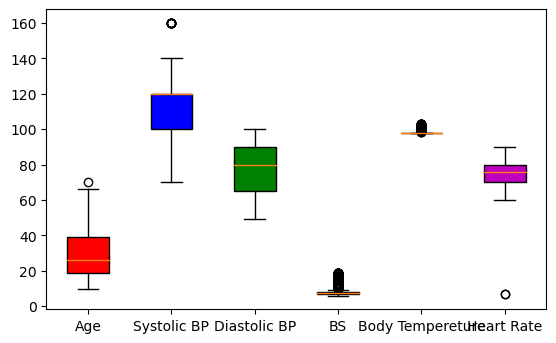

In [18]:
## EDA and Visualizations
print(data.describe())

###filtering out those outside the child bearing age
new_data = data.drop(data[(data['Age']>50) & (data['Age']<15)].index) ##filters age more than 50 years & less than 15 years


print(new_data.describe())
###boxplot of the fearures

plot_data = new_data[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]
##plot
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
box=plt.boxplot(plot_data, patch_artist=True)
##changing colors

colors = ['r', 'b','g', 'c','y','m']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

##box plot labels

ax.set_xticklabels(['Age','Systolic BP','Diastolic BP','BS','Body Tempereture','Heart Rate'])
 
# show plot
plt.show()

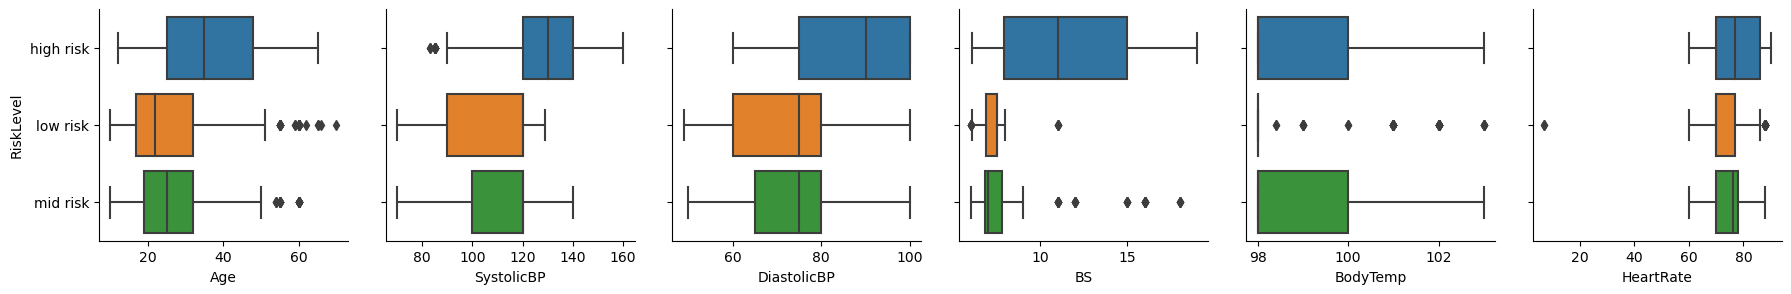

In [19]:
# relationship between risk level and the features
g = sns.PairGrid(new_data, x_vars=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'], y_vars="RiskLevel", height=3.0)
g.map(sns.boxplot)

In [20]:
##spliting data into training,validation and test sets

RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}##converting feature to float

# apply using map
new_data['RiskLevel'] = new_data['RiskLevel'].map(RiskLevel).astype(float)
new_data

labels = ['RiskLevel']
features=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']

y= new_data[labels]
x = new_data[features]

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2




Train accuracy: 0.7171052631578947
Test accuracy: 0.6748768472906403


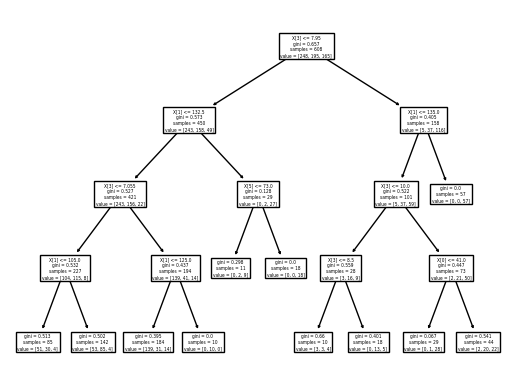

In [36]:
##Decision tree
import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = DecisionTreeClassifier(max_depth=4,
min_samples_leaf=10, min_samples_split=10)
decision_tree.fit(X_train,y_train)
tree.plot_tree(decision_tree)




In [40]:
##model accuracy
from sklearn.metrics import accuracy_score
predictions = decision_tree.predict(X_val)


print("Train accuracy:",decision_tree.score(X_train,y_train))
print("Evaluation accuracy", accuracy_score(y_val,predictions))
print("Test accuracy:",decision_tree.score(X_test,y_test))


Train accuracy: 0.7171052631578947
Evaluation accuracy 0.645320197044335
Test accuracy: 0.6748768472906403


In [35]:
##Random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0,
n_estimators=5, max_depth=6)
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.score(X_train, y_train)



C:\Users\daisy.chelangat\AppData\Local\Temp\ipykernel_7460\1733514175.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train, y_train)


0.8042763157894737

In [46]:
predictions= random_forest_classifier.predict(X_val)
print("Train accuracy:",random_forest_classifier.score(X_train,y_train))
print("Evaluation accuracy", accuracy_score(y_val,predictions))
print("Test accuracy:",random_forest_classifier.score(X_test,y_test))


Train accuracy: 0.8042763157894737
Evaluation accuracy 0.7438423645320197
Test accuracy: 0.7339901477832512


In [53]:
##ADABOOST
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=10)
adaboost_classifier.fit(x,y)
adaboost_classifier.score(X_train, y_train)

C:\Users\daisy.chelangat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6447368421052632

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, n_estimators=7)
gradient_boosting_classifier.fit(x, y)
gradient_boosting_classifier.score(x, y)

C:\Users\daisy.chelangat\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7120315581854043

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(random_state=0, n_estimators=5)
xgboost_classifier.fit(np.array(x), y)
xgboost_classifier.score(np.array(x), y)